# Credit EDA Assignment:

### Problem Statement: 
The loan providing companies find it hard to give loans to the people due to 
their insufficient or non-existent credit history. Because of that, some 
consumers use it to their advantage by becoming a defaulter. This case study 
aims to identify patterns which indicate if a client has difficulty paying their 
installments which may be used for taking actions such as denying the loan, 
reducing the amount of loan, lending (to risky applicants) at a higher interest 
rate, etc. Company wants to understand the driving factors (or driver variables) 
behind loan default, i.e. the variables which are strong indicators of default. 
The company can utilize this knowledge for its portfolio and risk assessment. 
We have Two data sets namely 'application_data.csv' and 
‘previous_application.csv' . I will analyze the data to find the driving factors 
which are the indicators of becoming a default. 


In [1]:
#Importing the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the libraries to use.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Setting the max column and row options:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",400)

In [4]:
#Reading the data
data = pd.read_csv("application_data.csv")


In [5]:
# Checking the head of the data to see the data headers and first 5rows data.
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Checking the tail of the data to see if there is any footer notes available
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [7]:
# Shape of the data
print(data.shape)

(307511, 122)


Shape: There are 122 columns and 307511 rows available in the data set

In [8]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
# Checking the columns and the data types for column
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
# Checking the null values in the entire data
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
# Checking the Percentage of null values in each column

(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## Observations: 
- Data have 122 columns and 307511 rows.
- There are Many null values in the data.
- And there are some columns starts with "DAYS" are showing negative values which are incorrect.
- I will drop some columns which are not very useful for analysis.
- I will also impute the appropriate value in place of Null values.

#### Null Values:
- By observing the data I can say there are many missing values in the data set.
- There are some columns with more then 50% of missing values.
- These missing values will affect our analysis.


# Handling the missing values:
- I will drop the columns which are having more then 40% of missing data.
- After droping the columns i will handle the missing values of rest of the data.

In [12]:
# Droping the columns having null values more than 40%.
data = data.loc[:, data.isnull().mean()< .4]

In [13]:
# Shape of the data after droping the columns
data.shape

(307511, 73)

In [14]:
# Checking null values 
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

### Data cleaning

In [15]:
# Missing data under OCCUPATION_TYPE
missing_OT = data[data.OCCUPATION_TYPE.isnull()]

In [16]:
missing_OT.NAME_INCOME_TYPE.unique()

array(['Pensioner', 'State servant', 'Commercial associate', 'Working',
       'Unemployed', 'Student', 'Maternity leave', 'Businessman'],
      dtype=object)

In [17]:
data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [18]:
data.OCCUPATION_TYPE.mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

### Assumptions:
- By observing the missing data under the OCCUPATION_TYPE column, there are different income type applicants available
- In this case we cannot impute the missing value with "MODE". The mode value here in this case is "Laborers".
- I am assuming that there are mixed income type of the missing data under OCCUPATION_TYPE, so I will mark this as a separate variable as "Others".

In [19]:
# Imputation:
data.OCCUPATION_TYPE.fillna("Others", inplace=True)

In [20]:
data.OCCUPATION_TYPE.value_counts()

Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [21]:
# Checking the missing data under EXT_SOURCE_3
data[data.EXT_SOURCE_3.isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,-615.0,-2056,1,1,0,1,0,0,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.642656,NaN,0.0,0.0,0.0,0.0,-188.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Median value of the EXT_SOURCE_3
data.EXT_SOURCE_3.median()

0.5352762504724826

### Assumptions:
- Data is missing here is not at random.
- I am imputing the median value for missing data for better analysis.

In [23]:
# Imputing the missing values:
data.EXT_SOURCE_3.fillna(data.EXT_SOURCE_3.median(), inplace=True)

In [24]:
data.EXT_SOURCE_3.isnull().sum()

0

In [25]:
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_18                0.000000
EXT_SOURCE_3                    0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5 

In [26]:
# Checking the missing data under NAME_TYPE_SUITE
data[data.NAME_TYPE_SUITE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,-4097,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.584887,0.095070,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,0.535276,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717,-2393,-5486.0,-4513,1,1,0,1,0,0,Others,2.0,1,1,SUNDAY,10,0,0,0,0,0,0,Transport: type 3,0.756676,0.544235,3.0,0.0,3.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,832500.0,NaN,State servant,Higher education,Separated,House / apartment,0.024610,-12975,-1839,-3896.0,-2179,1,1,0,1,1,0,Core staff,3.0,2,2,THURSDAY,12,0,0,0,0,0,0,Government,0.685813,0.528093,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,243000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010147,-12870,-2822,-777.0,-4371,1,1,1,1,1,0,Others,2.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.492076,0.178760,2.0,0.0,2.0,0.0,-326.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306273,454852,0,Revolving loans,M,N,Y,2,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.020713,-14079,-1648,-2492.0,-4905,1,1,1,1,1,0,Laborers,4.0,3,3,THURSDAY,6,0,0,0,0,0,0,Self-employed,0.608328,0.535276,0.0,0.0,0.0,0.0,-1154.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
306544,455158,0,Cash loans,F,N,N,0,180000.0,894825.0,23602.5,894825.0,NaN,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.026392,-19625,-1634,-12077.0,-721,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity T

In [27]:
# Value_counts of column NAME_TYPE_SUITE
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [28]:
# Mode of the given data:
data.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

### Assumptions:
- NAME_TYPE_SUITE is a categorial data type, imputing the missing values with "mode" is the best way for analysis.

In [29]:
# Imputing the Mode value:
data.NAME_TYPE_SUITE.fillna(data.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [30]:
data.NAME_TYPE_SUITE.isnull().sum()

0

In [31]:
data.isnull().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_7                    0
EXT_SOURCE_3                       0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_10                   0
LIVE_CITY_NOT_WORK_CITY            0
F

### Observations:
- There are 4 columns namely "DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE"
- Which have 0.33% of missing values.
- These are important column for analysis.
- These columns are numerical, I am imputing the median value for the values which are missing.

In [32]:
# Median values for 4 columns mentioned above:
print(data.DEF_60_CNT_SOCIAL_CIRCLE.median())
print(data.OBS_60_CNT_SOCIAL_CIRCLE.median())
print(data.DEF_30_CNT_SOCIAL_CIRCLE.median())
print(data.OBS_30_CNT_SOCIAL_CIRCLE.median())

0.0
0.0
0.0
0.0


In [33]:
# Imputing the median value in place of missing values:
data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(data.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(data.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(data.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(data.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)

In [34]:
# Checking null values
data.isnull().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_2                    0
OBS_30_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_30_CNT_SOCIAL_CIRCLE           0
FLAG_DOCUMENT_7                    0
EXT_SOURCE_3                       0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_10                   0
LIVE_CITY_NOT_WORK_CITY            0
F

### Assumptions:
- As mentioned above, some columns are not really useful for the analysis. So I will drop the columns which I feel not useful for analysis.
- These columns are related to documents and Number of enquiries to Credit Bureau. I assume that this are not importmant for our analysis.

### Droping columns:
-["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

In [35]:
# List of columns which needs to Drop:
drop = ["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [36]:
# Droping the columns:
data.drop(drop, axis=1, inplace=True)

In [37]:
# Shape after droping the columns:
data.shape

(307511, 47)

In [38]:
data.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
LIVE_REGION_NOT_WORK_REGION      0
OCCUPATION_TYPE                  0
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_WORK_CITY           0
REG_CITY_NOT_LIVE_CITY           0
FLAG_PHONE                       0
LIVE_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE                0
EXT_SOURCE_3                     0
OBS_30_CNT_SOCIAL_CIRCLE         0
DEF_30_CNT_SOCIAL_CIRCLE         0
OBS_60_CNT_SOCIAL_CIRCLE         0
DEF_60_CNT_SOCIAL_CIRCLE         0
FLAG_EMAIL                       0
SK_ID_CURR                       0
FLAG_CONT_MOBILE                 0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER         

In [39]:
# Checking median value of EXT_SOURCE_2 column
data.EXT_SOURCE_2.median()

0.5659614260608526

In [40]:
# Imputing the median value:
data.EXT_SOURCE_2.fillna(data.EXT_SOURCE_2.median(), inplace=True)

In [41]:
data.EXT_SOURCE_2.isnull().sum()

0

In [42]:
# Checking null values in AMT_ANNUITY column
data[data.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,0.372334,1.0,0.0,1.0,0.0,-2.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,0.468660,0.0,0.0,0.0,0.0,-706.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,0.452534,1.0,0.0,1.0,0.0,-199.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,0.220095,0.0,0.0,0.0,0.0,-2841.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,0.177704,0.0,0.0,0.0,0.0,-743.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,0.425893,0.0,0.0,0.0,0.0,-1986.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,1,1,0,1,1,0,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.154811,0.297087,0.0,0.0,0.0,0.0,-348.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.019689,-13902,-3540,-168.0,-4250,1,1,0,1,0,1,Secretaries,2.0,2,2,SATURDAY,12,0,0,0,0,0,0,Self-employed,0.510934,0.581484,0.0,0.0,0.0,0.0,-1331.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.018634,-10151,-472,-10127.0,-2787,1,1,0,1,1,0,Security staff,2.0,2,2,WEDNESDAY,13,1,1,1,1,1,1,Security,0.706306,0.391055,0.0,0.0,0.0,0.0,-295.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Unaccompanied,Commercial associate,Higher education,Married,Municipal apartment,0.046220,-16344,-1478,-482.0,-4192,1,1,0,1,0,0,Sales staff,2.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Business Entity Type 3,0.618698,0.431192,1.0,0.0,1.0,0.0,-1255.0


### Observations:
- Missing data in AMT_ANNUITY column are having AMT_CREDIT details and almost all the applicants NAME_TYPE_SUITE is "Unaccompanied".
- As we can observe that each one having the AMT_CREDIT details, there is high chances of AMT_ANNUITY.
- So I will impute the missing value with "median".

In [43]:
# Imputing the median:
data.AMT_ANNUITY.fillna(data.AMT_ANNUITY.median(), inplace=True)

In [44]:
data.AMT_ANNUITY.isnull().sum()

0

In [45]:
data.isnull().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                278
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
LIVE_REGION_NOT_WORK_REGION      0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY           0
FLAG_CONT_MOBILE                 0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE                0
EXT_SOURCE_2                     0
EXT_SOURCE_3                     0
OBS_30_CNT_SOCIAL_CIRCLE         0
DEF_30_CNT_SOCIAL_CIRCLE         0
OBS_60_CNT_SOCIAL_CIRCLE         0
DEF_60_CNT_SOCIAL_CIRCLE         0
FLAG_PHONE                       0
SK_ID_CURR                       0
TARGET                           0
FLAG_EMP_PHONE                   0
NAME_CONTRACT_TYPE               0
CODE_GENDER         

In [46]:
# Checking null values under AMT_GOODS_PRICE:
data[data.AMT_GOODS_PRICE.isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,0.535276,2.0,1.0,2.0,1.0,-2011.0
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-11993,-2921,-1289.0,-1948,1,1,1,1,1,1,Private service staff,2.0,2,2,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.464614,0.537070,0.0,0.0,0.0,0.0,-476.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,Unaccompanied,Working,Higher education,Married,House / apartment,0.008474,-9727,-2712,-4132.0,-800,1,1,1,1,1,0,Accountants,2.0,2,2,WEDNESDAY,18,0,0,0,0,0,0,Trade: type 7,0.565849,0.535276,1.0,1.0,1.0,0.0,-643.0
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,-11079,-899,-3765.0,-572,1,1,1,1,1,0,Managers,3.0,1,1,WEDNESDAY,11,0,0,0,0,0,0,Government,0.645519,0.863363,1.0,0.0,1.0,0.0,-1292.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.032561,-9986,-1847,-4762.0,-506,1,1,1,1,1,0,Security staff,1.0,1,1,SATURDAY,18,0,0,0,0,0,0,Construction,0.552557,0.661024,1.0,0.0,1.0,0.0,-159.0


In [47]:
# Checking the median value:
data.AMT_GOODS_PRICE.median()

450000.0

In [48]:
# Imputing the median value:
data.AMT_GOODS_PRICE.fillna(data.AMT_GOODS_PRICE.median(), inplace=True)

In [49]:
data.AMT_GOODS_PRICE.isnull().sum()

0

In [50]:
# Checking null values:
data.isnull().sum().sort_values(ascending=False)

CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
LIVE_REGION_NOT_WORK_REGION    0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY         0
FLAG_CONT_MOBILE               0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
FLAG_PHONE                     0
SK_ID_CURR                     0
TARGET                         0
NAME_TYPE_SUITE                0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDR

In [51]:
# checking null values under CNT_FAM_MEMBERS:
data[data.CNT_FAM_MEMBERS.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,450000.0,Unaccompanied,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.700618,0.535276,3.0,0.0,3.0,0.0,-876.0
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,450000.0,Unaccompanied,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.645168,0.670652,1.0,0.0,1.0,0.0,-654.0


### Assumptions:
- There are 2 null values in CNT_FAM_MEMBERS. 
- NAME_FAMILY_STATUS for the both the null values is Unknown and NAME_TYPE_SUITE is mentioned as Unaccompanied.
- We can assume that applicant might be single but we will try to observe the mean, median, mode under this CNT_FAM_MEMBERS.
- In CNT_FAM_MEMBERS column mean, median and mode value is same which is "2" so we will impute median value in place of missing value. 

In [52]:
data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [53]:
# Checking Mean, Median and mode of the CNT_FAM_MEMBERS column:
print(data.CNT_FAM_MEMBERS.mean())
print(data.CNT_FAM_MEMBERS.median())
print(data.CNT_FAM_MEMBERS.mode())

2.152665450442101
2.0
0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64


In [54]:
# Imputation:
data.CNT_FAM_MEMBERS.fillna(data.CNT_FAM_MEMBERS.median(), inplace=True)

In [55]:
data.CNT_FAM_MEMBERS.isnull().sum()

0

In [56]:
# checking null values:
data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

### Assumptions:
- There is only one null value in DAYS_LAST_PHONE_CHANGE column. This null value may be missing at random. I will impute median value to analyze the data.

In [57]:
# Median value of DAYS_LAST_PHONE_CHANGE:
data.DAYS_LAST_PHONE_CHANGE.median()

-757.0

In [58]:
# Imputation:
data.DAYS_LAST_PHONE_CHANGE.fillna(data.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [59]:
data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [60]:
data.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,Others,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,0.535276,2.0,0.0,2.0,0.0,-1673.0


### Observations / Assumptions:
- As mentioned above columns "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE" are having nagative values which are incorrect.
- This negative values may be showing by error, as these values cannot be negative.
- I will round this columns for better analysis.

In [61]:
# Incorrect values
day =[]
for x in data.columns:
    if x.startswith("DAYS"):
        day.append(x)
print(day)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [62]:
data[day] = abs(data[day])

In [63]:
data[day]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


In [64]:
# Reading the data head:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Adding new Columns
- Converting 'DAYS_BIRTH'and 'DAYS_EMPLOYED' to years and creating new columns "Age" and "Experience".
- This is done for better understanding and analysis.

In [66]:
#'DAYS_BIRTH', 'DAYS_EMPLOYED'

data["Age"] =  data.DAYS_BIRTH.apply(lambda x:round(x/365))
data["Experience"] = data.DAYS_EMPLOYED.apply(lambda x:round(x/365))

In [67]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age,Experience
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,46,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,52,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,55,8


In [68]:
data.shape

(307511, 49)

In [69]:
data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

# Observations:
- Few columns which are not very useful for analysis can be dropped.
- Dropping the columns "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL" which are not very useful for analysis.

In [70]:
# Droping the columns:
data.drop(columns=["FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL"], inplace=True)

In [71]:
# Shape after droping:
data.shape

(307511, 44)

In [72]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age,Experience
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,46,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,52,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,55,8


In [73]:
# I am segmenting the numerical and non numerical columns for data visualization:

Numeric = ["int64","float64","int32","float32"]
Numeric_cols = list(data.select_dtypes(include= Numeric).columns)
Char_cols = list(data.select_dtypes(exclude= Numeric).columns)

In [74]:
print(Numeric_cols)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'Age', 'Experience']


In [75]:
print(Char_cols)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [76]:
Numeric_cols = ["CNT_CHILDREN","AMT_INCOME_TOTAL",'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','Age','Experiance']

In [77]:
data.reset_index(inplace = True, drop =True)

# Univariate Analysis

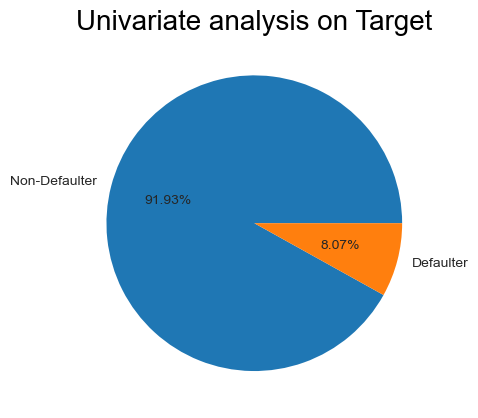

In [78]:
plt.style.use('seaborn-darkgrid')
plt.pie(data.TARGET.value_counts(), labels=["Non-Defaulter", "Defaulter"], autopct="%3.2f%%")
plt.title("Univariate analysis on Target", fontdict={'fontsize': 20, 'fontweight' : 10, 'color' : 'black'})
plt.show()

In [79]:
91.93/8.07

11.391573729863692

### Data imbalance:
- There is data imbalance in the given data.
- We can observe that defaulters percentage is 8.07% and non defaulters are 91.93%. 
- Which means non defaulters are 11.39 times more than defaulters.

In [80]:
defaulter = data[data.TARGET==1]
non_defaulter = data[data.TARGET==0]

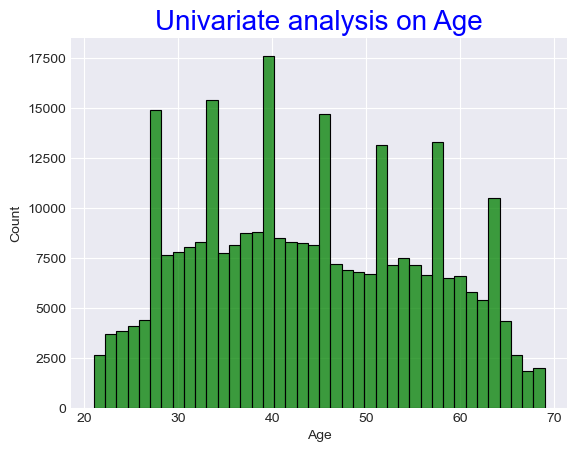

In [81]:
sns.histplot(data.Age, bins= 40,color="Green")
plt.title("Univariate analysis on Age", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

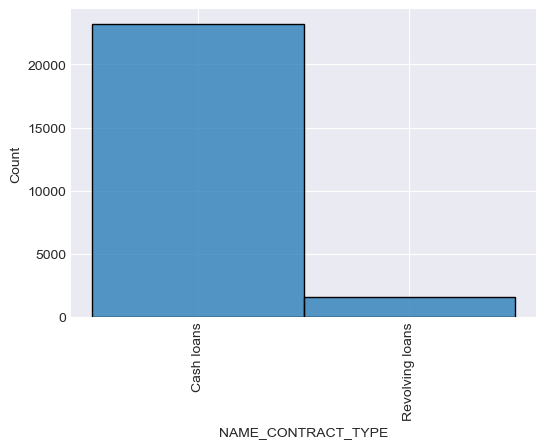

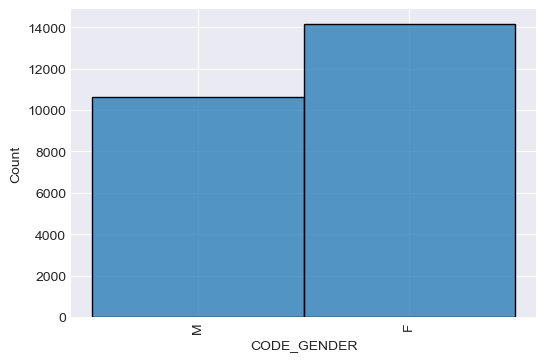

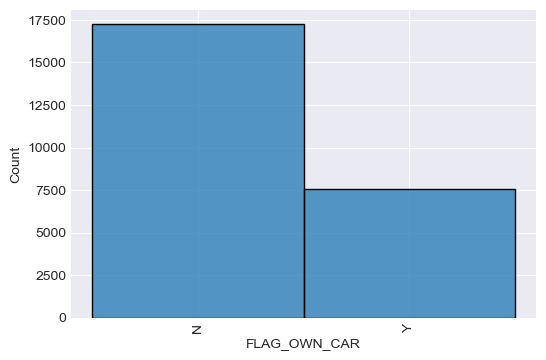

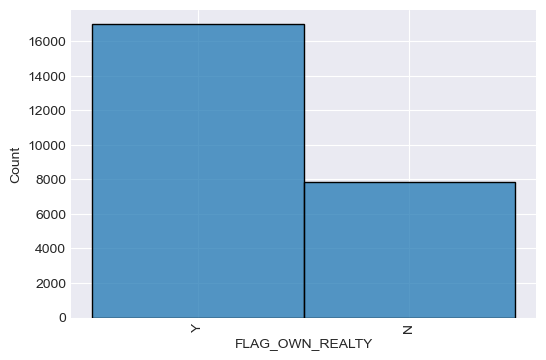

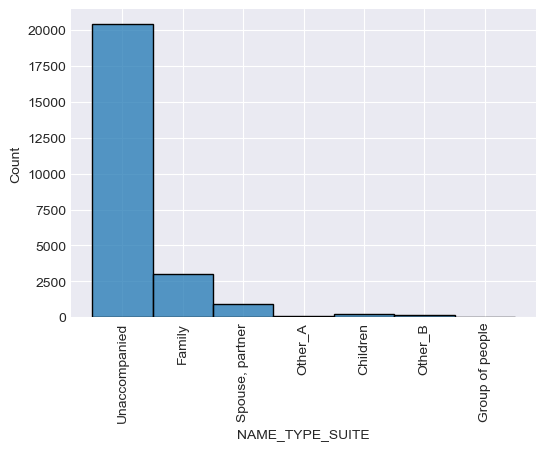

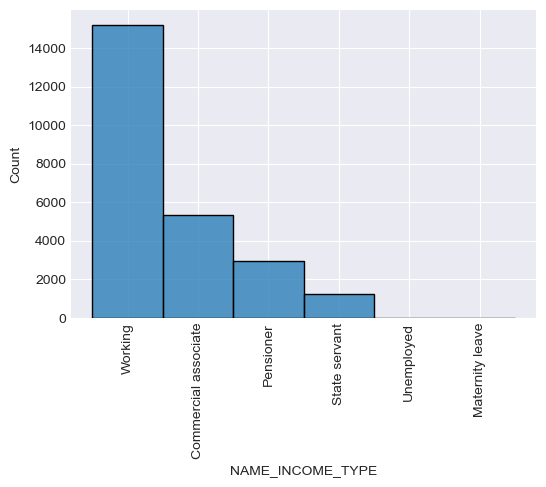

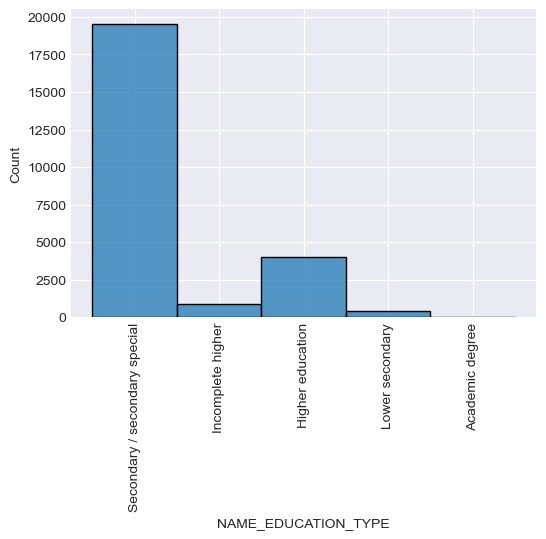

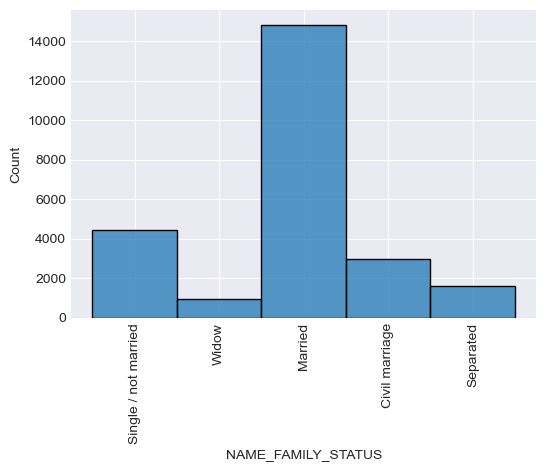

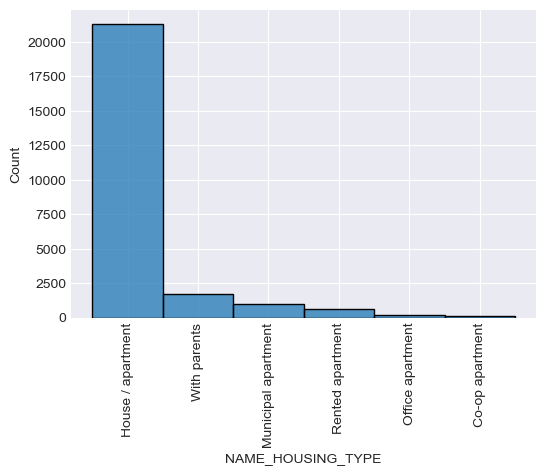

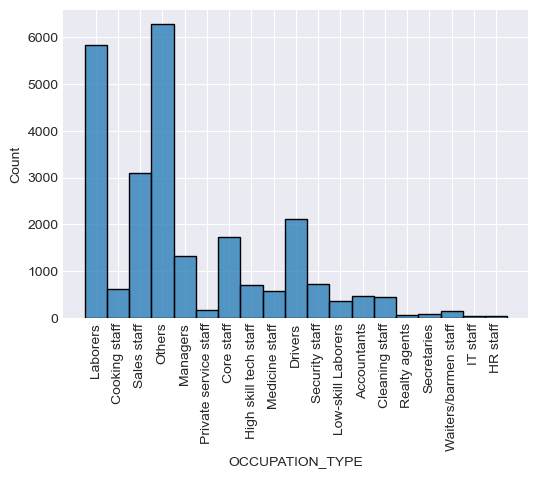

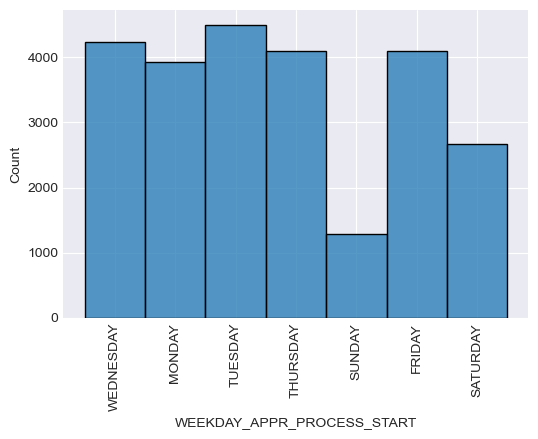

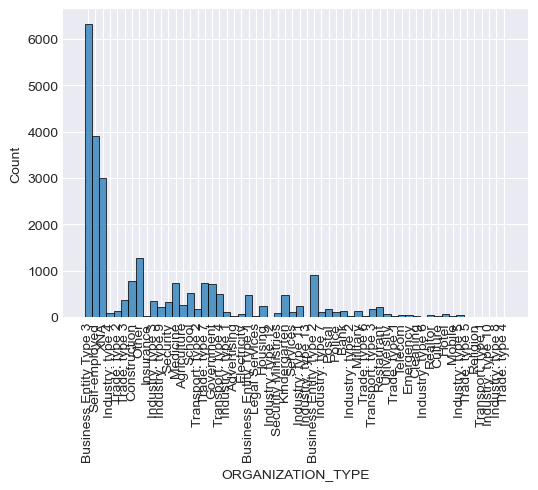

In [82]:
# Analysing Char_cols:
for i in Char_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(defaulter[i])
    plt.xticks(rotation =90)
    plt.show()

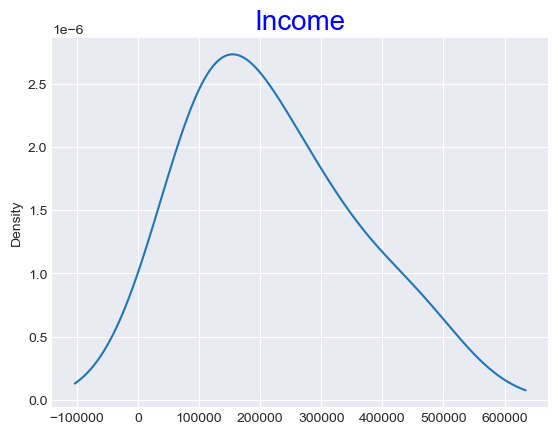

In [83]:
# Income distribution of defaulters:
defaulter.AMT_INCOME_TOTAL.quantile([0.1,0.3,0.5, 0.7, 0.9, 0.95, 0.99]).plot.density()
plt.title("Income", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

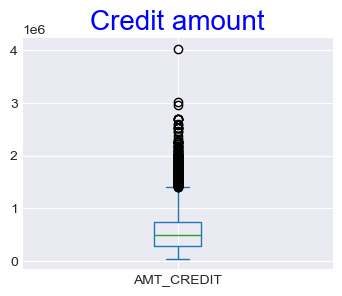

In [84]:
# Credit amount distribution:
plt.figure(figsize=(4,3))
defaulter.AMT_CREDIT.plot.box()
plt.title("Credit amount", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

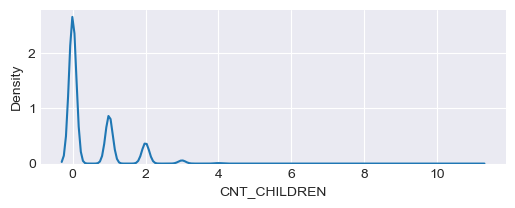

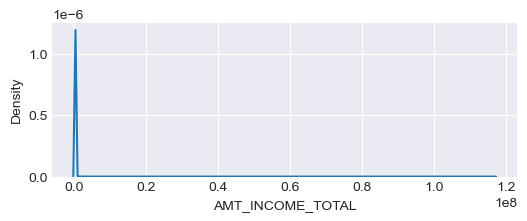

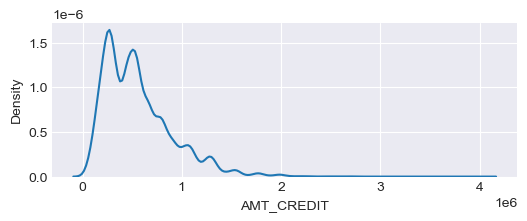

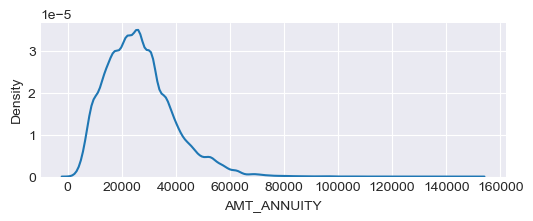

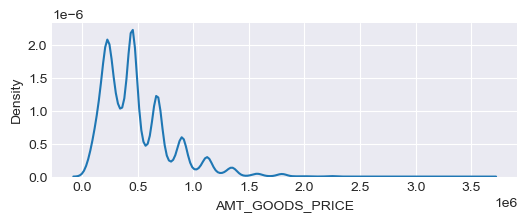

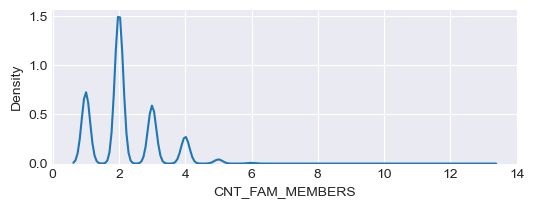

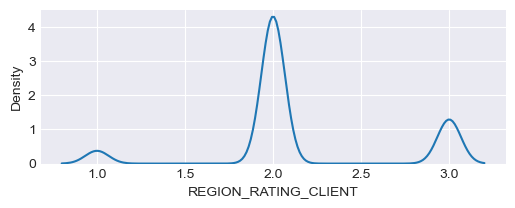

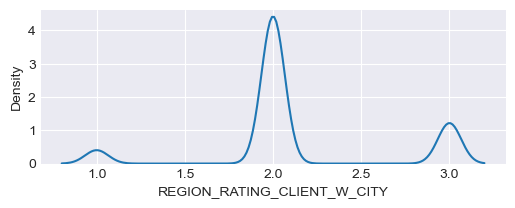

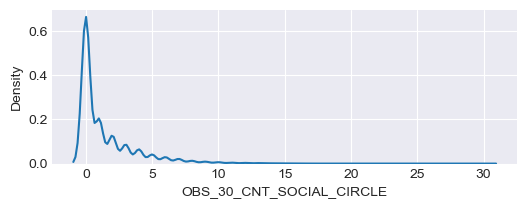

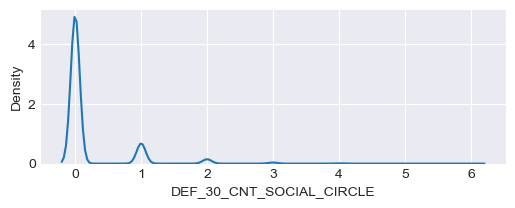

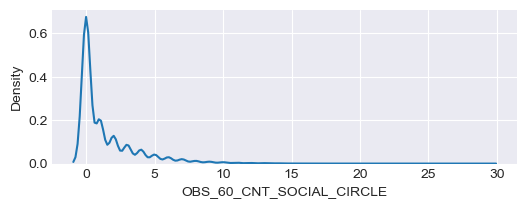

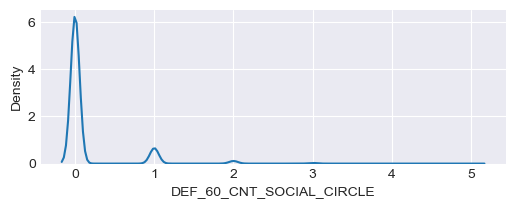

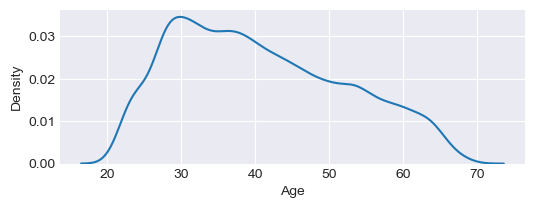

KeyError: 'Experiance'

<Figure size 600x200 with 0 Axes>

In [85]:
# Analysing Numerical_cols:
for i in Numeric_cols:
    plt.figure(figsize=(6,2))
    sns.kdeplot(defaulter[i])
    plt.show()

## Bivariate Analysis

- To perform the bivariate analysis, we need to check for data imbalance.
- As we have seen, data imbalance is there in the given data.
- I will perform the analysis of Target column variables separately due to data imbalance.

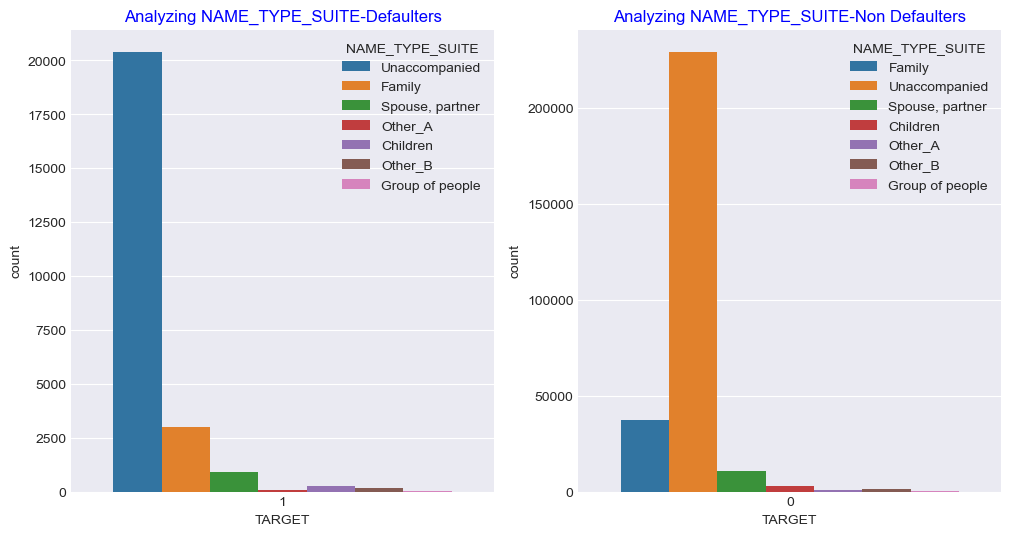

In [86]:
# Accompanying client when applying loan:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=defaulter, x="TARGET", hue="NAME_TYPE_SUITE")
plt.title("Analyzing NAME_TYPE_SUITE-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.subplot(1,2,2)
sns.countplot(data=non_defaulter, x="TARGET", hue="NAME_TYPE_SUITE")
plt.title("Analyzing NAME_TYPE_SUITE-Non Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

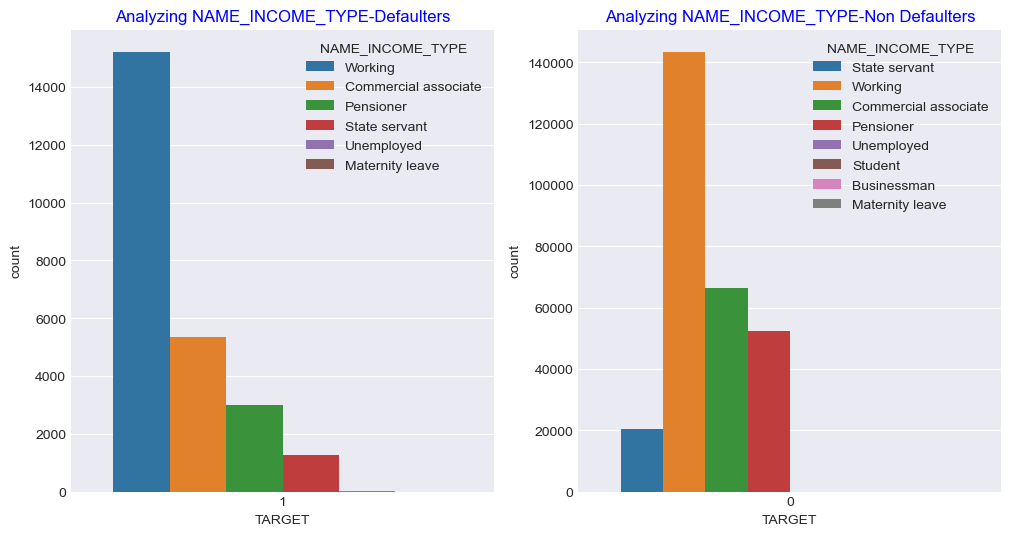

In [87]:
# Income type distribution:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=defaulter, x="TARGET",hue="NAME_INCOME_TYPE")
plt.title("Analyzing NAME_INCOME_TYPE-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.subplot(1,2,2)
sns.countplot(data=non_defaulter, x="TARGET", hue="NAME_INCOME_TYPE")
plt.title("Analyzing NAME_INCOME_TYPE-Non Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

In [88]:
defaulter.groupby(["NAME_CONTRACT_TYPE"])["AMT_INCOME_TOTAL"].mean()

NAME_CONTRACT_TYPE
Cash loans         167353.820593
Revolving loans    140392.080112
Name: AMT_INCOME_TOTAL, dtype: float64

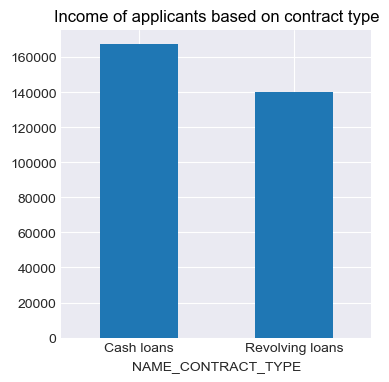

In [89]:
# Income of applicants based on contract type:
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_CONTRACT_TYPE"])["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.title("Income of applicants based on contract type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.xticks(rotation =0)
plt.show()

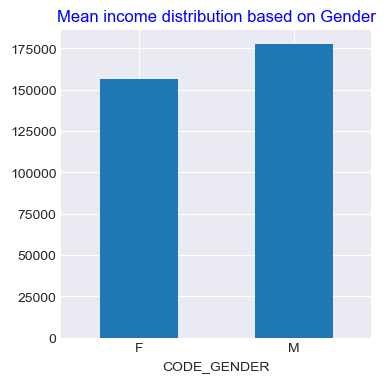

In [90]:
# Mean income distribution based on Gender:
plt.figure(figsize=(4,4))
defaulter.groupby(["CODE_GENDER"])["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.title("Mean income distribution based on Gender", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation =0)
plt.show()

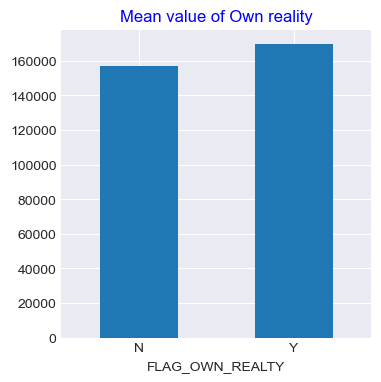

In [91]:
# Own reality:
plt.figure(figsize=(4,4))
defaulter.groupby(["FLAG_OWN_REALTY"])["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.title("Mean value of Own reality", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation =0)
plt.show()

<Figure size 400x400 with 0 Axes>

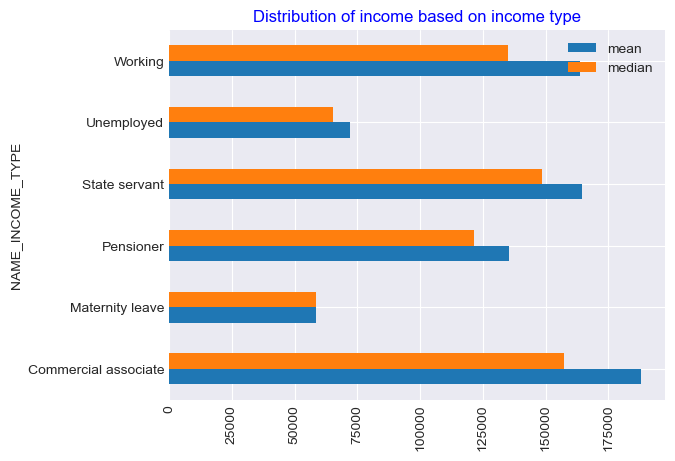

In [92]:
# Distribution of income based on income type:
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_INCOME_TYPE"])["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.barh()
plt.title("Distribution of income based on income type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation =90)
plt.show()

<Figure size 400x400 with 0 Axes>

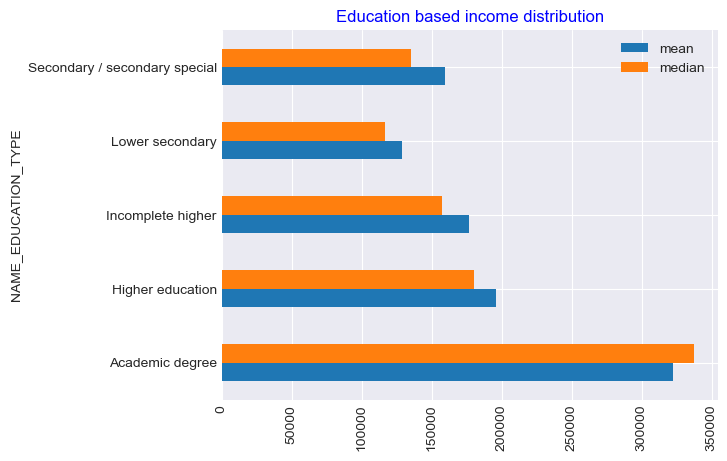

In [93]:
# Education based income distribution:
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_EDUCATION_TYPE"])["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.barh()
plt.title("Education based income distribution", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation =90)
plt.show()

<Figure size 400x400 with 0 Axes>

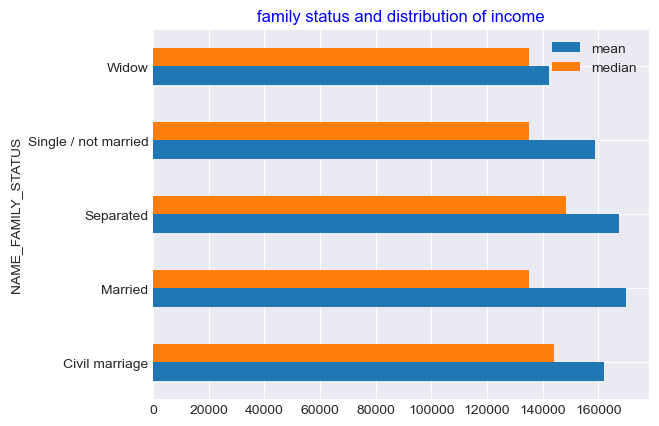

In [94]:
# family status and income:
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_FAMILY_STATUS"])["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.barh()
plt.title("family status and distribution of income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation =0)
plt.show()

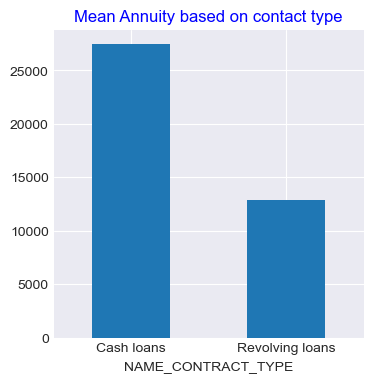

In [95]:
# Mean annuity based on contact type:
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_CONTRACT_TYPE"])["AMT_ANNUITY"].mean().plot.bar()
plt.title("Mean Annuity based on contact type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation =0)
plt.show()

<Figure size 400x400 with 0 Axes>

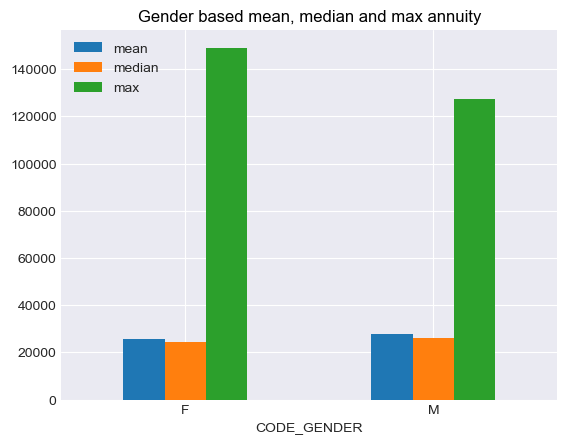

In [96]:
# Gender based mean, median and max annuity:
plt.figure(figsize=(4,4))
defaulter.groupby(["CODE_GENDER"])["AMT_ANNUITY"].aggregate(["mean","median","max"]).plot.bar()
plt.title("Gender based mean, median and max annuity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.xticks(rotation =0)
plt.show()

<Figure size 400x400 with 0 Axes>

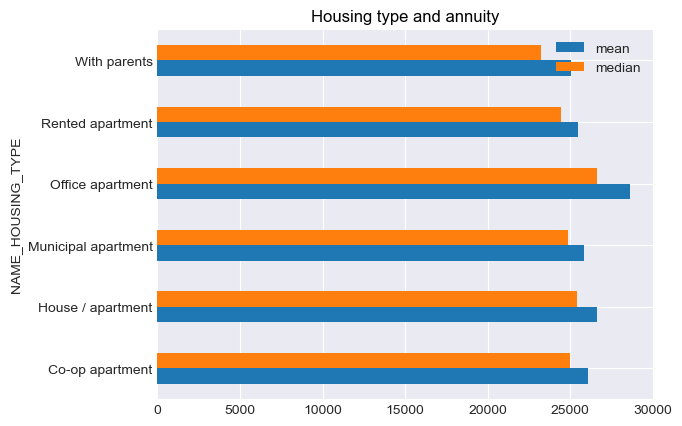

In [97]:
# Housing type and annuity:
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_HOUSING_TYPE"])["AMT_ANNUITY"].aggregate(["mean","median"]).plot.barh()
plt.title("Housing type and annuity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.xticks(rotation =0)
plt.show()

<Figure size 400x400 with 0 Axes>

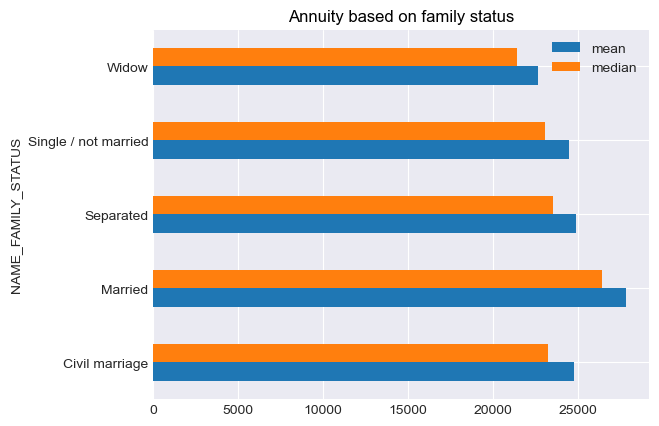

In [98]:
# Annuity based on family status:
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_FAMILY_STATUS"])["AMT_ANNUITY"].aggregate(["mean","median"]).plot.barh()
plt.title("Annuity based on family status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.title
plt.xticks(rotation =0)
plt.show()

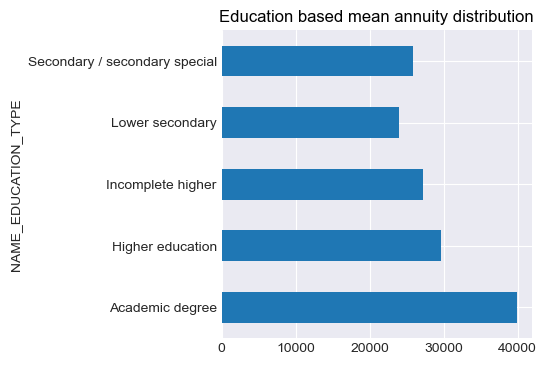

In [99]:
# Education based mean annuity distribution"
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_EDUCATION_TYPE"])["AMT_ANNUITY"].mean().plot.barh()
plt.title("Education based mean annuity distribution", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.xticks(rotation =0)
plt.show()

<Figure size 400x400 with 0 Axes>

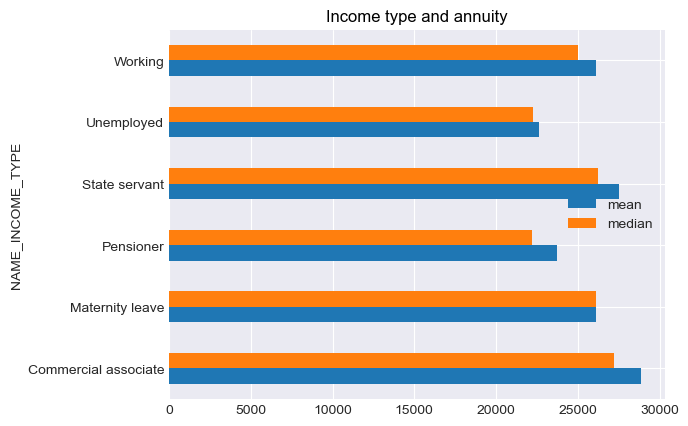

In [100]:
# Income type and annuity:
plt.figure(figsize=(4,4))
defaulter.groupby(["NAME_INCOME_TYPE"])["AMT_ANNUITY"].aggregate(["mean","median"]).plot.barh()
plt.title("Income type and annuity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.xticks(rotation =0)
plt.show()

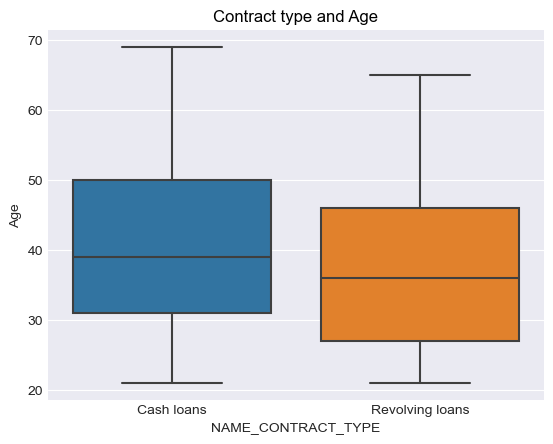

In [101]:
#boxplot of age with NAME_CONTRACT_TYPE
sns.boxplot(data = defaulter, x="NAME_CONTRACT_TYPE", y="Age")
plt.title("Contract type and Age", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.show()

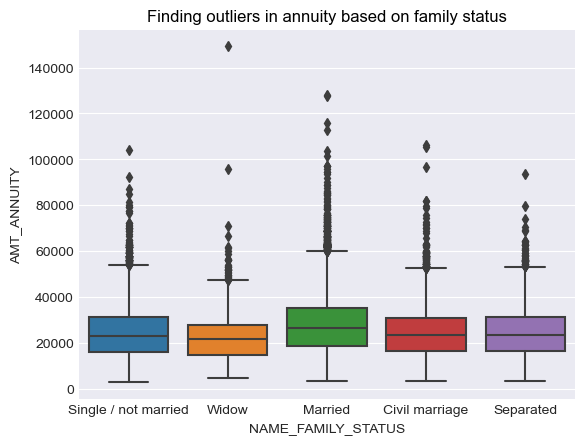

In [102]:
# Finding outliers in annuity based on family status:
sns.boxplot(data = defaulter, x="NAME_FAMILY_STATUS", y="AMT_ANNUITY")
plt.title("Finding outliers in annuity based on family status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.show()

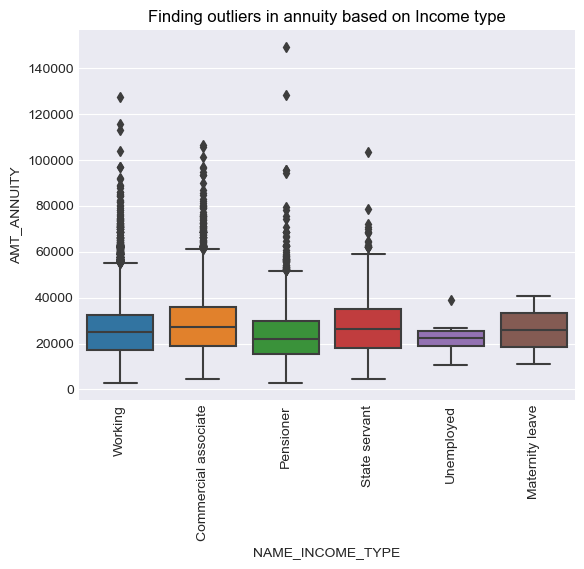

In [103]:
# Finding outliers in annuity based on Income type:
sns.boxplot(data = defaulter, x="NAME_INCOME_TYPE", y="AMT_ANNUITY")
plt.title("Finding outliers in annuity based on Income type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.xticks(rotation =90)
plt.show()

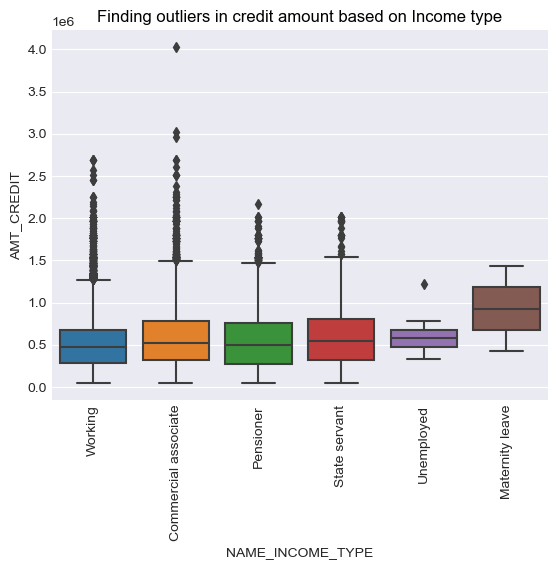

In [104]:
# Finding outliers in credit amount based on Income type:
sns.boxplot(data = defaulter, x="NAME_INCOME_TYPE", y="AMT_CREDIT")
plt.title("Finding outliers in credit amount based on Income type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.xticks(rotation =90)
plt.show()

In [105]:
defaulter["age_group"] = pd.cut(defaulter.Age,[0,30,40,50,60,9999], labels = ["<30", "30-40","40-50","50-60","60+"])

In [106]:
defaulter.age_group.value_counts(normalize=True)

30-40    0.314562
40-50    0.230614
<30      0.225297
50-60    0.165237
60+      0.064290
Name: age_group, dtype: float64

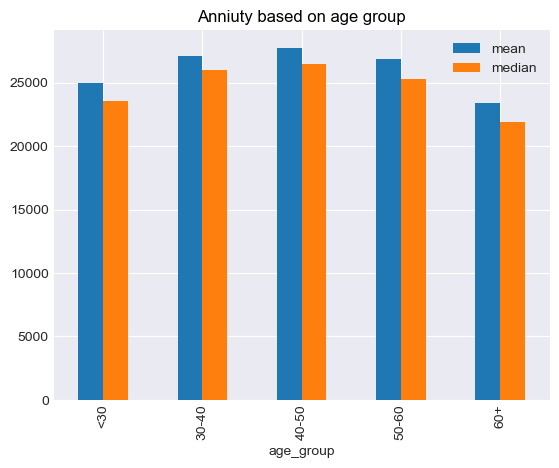

In [107]:
# Anniuty based on age group :
defaulter.groupby(["age_group"])["AMT_ANNUITY"].aggregate(["mean","median"]).plot.bar()
plt.title("Anniuty based on age group", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.show()

In [108]:
# Pivot table:
result = pd.pivot_table(data =defaulter, index="NAME_HOUSING_TYPE", columns="NAME_FAMILY_STATUS", values="OBS_60_CNT_SOCIAL_CIRCLE")
result

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
NAME_HOUSING_TYPE,,,,,
Co-op apartment,2.800000,2.166667,2.200000,0.967742,0.000000
House / apartment,1.402152,1.605777,1.236960,1.293264,1.453801
Municipal apartment,1.270492,1.354776,1.200000,1.153005,1.134615
Office apartment,1.227273,1.588785,0.545455,1.115385,1.666667
Rented apartment,0.833333,1.166113,1.000000,1.105590,1.285714
With parents,1.397260,1.447059,1.209677,1.331699,1.812500


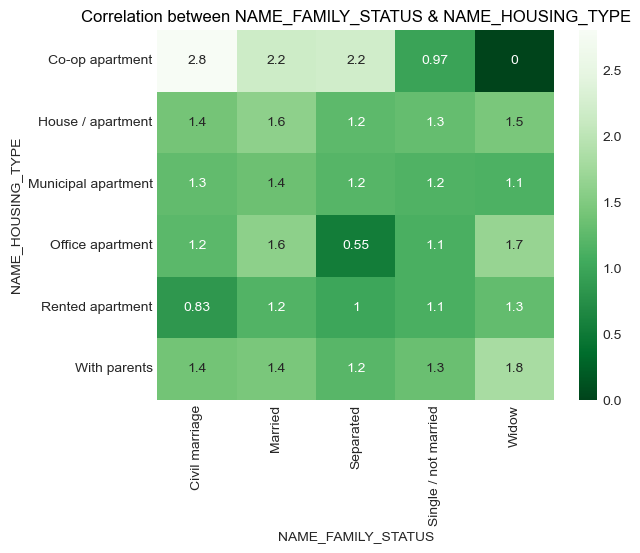

In [109]:
sns.heatmap(result, annot=True, cmap="Greens_r")
plt.title("Correlation between NAME_FAMILY_STATUS & NAME_HOUSING_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.show()

In [110]:
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age,Experience,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,26,2,<30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,1,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,51,7,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,48,3,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,1,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,37,10,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,1,Others,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,68,1001,60+


## Findings:

- We have data imbalance in the given data set, We can observe that defaulters percentage is 8.07% and non defaulters are 91.93%.
- We can observe that people with age 40 are applied the most for the loan.
- There are high number applicants who are applied for cash loans have payment difficulties.
- Female applicants are comparatively more in number in terms for payment difficulties.
- People who are not having the own reality and car are having more payment difficulties then people who are having the same.
- Applicants who are Unaccompanied while applying the loan are more in number and they are having payment difficulties.
- Working professional, people with secondary education and married people are having more payment difficulties.
- Applicants whose income between 1,00,000 to 2,00,000 are highly facing payment difficulties.
- Applicants with 0 to 1 year experiance are facing more payment difficulties.
- Commercial associates and working people mean income is more then the others.
- People with academic degree are having high income.
- Mean total of annuity is high for cash loans.
- Married applicants have high annuity.
- People live in Co-op apartment and civil married are having high 60 DPD (days past due) default.

## Previous application data

In [111]:
# Reading the Previous application data:
prev_data = pd.read_csv("previous_application.csv")

In [112]:
# Checking the shape of the previous data:
prev_data.shape

(1670214, 37)

In [113]:
# First 5rows of previous application data:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# Last 5 Rows of previous application data to find out if there are any footer notes available:
prev_data.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [115]:
# Previous data information, dtypes and non-null values of each column:
prev_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [116]:
# Describe
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [117]:
# Calculating null values:
(prev_data.isnull().sum()/len(prev_data)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

### Observations:
- There are huge null values in the previous application data set.
- There are some columns with more then 40% of missing values.
- These missing values will affect our analysis.
- I will drop the columns with missing values more than 40%.

In [118]:
# Droping the columns having null values more than 40%.
prev_data = prev_data.loc[:, prev_data.isnull().mean()< .40]

In [119]:
# Shape after droping the columns:
prev_data.shape

(1670214, 26)

In [120]:
# Checking the head of the data again:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


### Observations:
- DAYS_DECISION column have some negative values which may occurred while entering the data or it can be system error.
- I will convert these values to absolute values for better analysis.

In [121]:
# Converting the DAYS_DECISION column data values to absolute values:
prev_data["DAYS_DECISION"]= abs(prev_data["DAYS_DECISION"])

In [122]:
# First 5rows of data to verify the changes made:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


### Handling Missing values

In [123]:
# Checking missing values: 
print(prev_data.AMT_ANNUITY.isnull().sum())
print(prev_data.AMT_CREDIT.isnull().sum())
print(prev_data.AMT_GOODS_PRICE.isnull().sum())

372235
1
385515


### Observations And Assumptions:
- There are many null values in annuity and goods price columns.
- And credit amount column having only 1 missing value. I will leave it as it is.
- I will impute the missing values with median value, as it is a numarical data.

In [124]:
# Median values:
print(prev_data.AMT_ANNUITY.median())
print(prev_data.AMT_GOODS_PRICE.median())

11250.0
112320.0


In [125]:
# Imputing the missing values:
prev_data.AMT_ANNUITY.fillna(prev_data.AMT_ANNUITY.median(), inplace=True)
prev_data.AMT_GOODS_PRICE.fillna(prev_data.AMT_GOODS_PRICE.median(), inplace=True)

In [126]:
# Checking the missing values again:
print(prev_data.AMT_ANNUITY.isnull().sum())
print(prev_data.AMT_GOODS_PRICE.isnull().sum())

0
0


In [127]:
# checking Null values in previous data:
prev_data.isnull().sum().sort_values(ascending=False)

CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
NAME_PAYMENT_TYPE                   0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
CODE_REJECT_REASON                  0
SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_GOODS_PRICE                     0
AMT_APPLICATION                     0
AMT_ANNUITY                         0
NAME_CONTRACT_TYPE                  0
DAYS_DECISION                       0
dtype: int64

In [128]:
# Handing missing values under CNT_PAYMENT:
prev_data.CNT_PAYMENT.isnull().sum()

372230

### Obsevations and Assumptions:
- There are 372230 null values in CNT_PAYMENT, is about the Term of previous credit at application of the previous application.
- There is a possibility that applicant is applying loan for the first time. 
- Imputing the missing value with mean or median may affect the analysis hence I am imputing the 0("Zero") value.

In [129]:
# Imputing the missing values:
prev_data.CNT_PAYMENT.fillna(0, inplace=True)

In [130]:
# Checking the missing values again for varification:
prev_data.CNT_PAYMENT.isnull().sum()

0

In [131]:
# Handiling the missing data under PRODUCT_COMBINATION:
prev_data.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [132]:
# Mode value of PRODUCT_COMBINATION:
prev_data.PRODUCT_COMBINATION.mode()[0]

'Cash'

In [133]:
# Imputing the mode value:
prev_data.PRODUCT_COMBINATION.fillna(prev_data.PRODUCT_COMBINATION.mode()[0], inplace=True)

In [134]:
# Checking the null values:
prev_data.PRODUCT_COMBINATION.isnull().sum()

0

In [135]:
# Previous data head()
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [136]:
# Null values
prev_data.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                     1
SK_ID_PREV                     0
NAME_PAYMENT_TYPE              0
NAME_YIELD_GROUP               0
CNT_PAYMENT                    0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
DAYS_DECISION                  0
SK_ID_CURR                     0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_GOODS_PRICE                0
AMT_APPLICATION                0
AMT_ANNUITY                    0
NAME_CONTRACT_TYPE             0
PRODUCT_COMBINATION            0
dtype: int64

## Analysing the Previous data

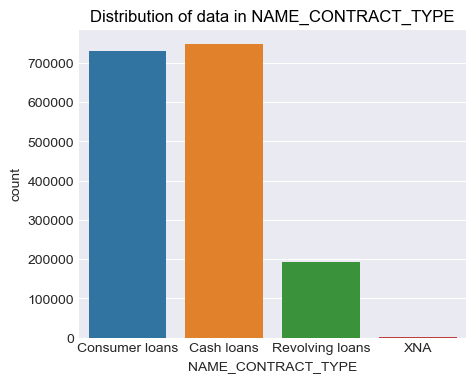

In [137]:
# Distribution of data in NAME_CONTRACT_TYPE:
plt.figure(figsize=(5,4))
sns.countplot(prev_data.NAME_CONTRACT_TYPE)
plt.title("Distribution of data in NAME_CONTRACT_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.show()

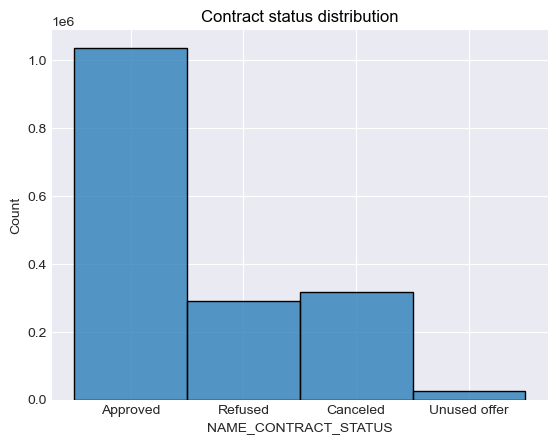

In [138]:
# Checking contract status distribution:
sns.histplot(prev_data.NAME_CONTRACT_STATUS)
plt.title("Contract status distribution", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.show()

In [139]:
prev_data.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

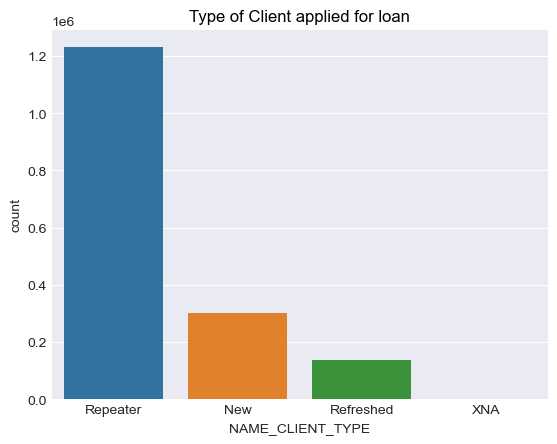

In [140]:
# Type of Client applied for loan:
sns.countplot(prev_data.NAME_CLIENT_TYPE)
plt.title("Type of Client applied for loan", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
plt.show()

Text(0.5, 1.0, 'Application amount among the client type')

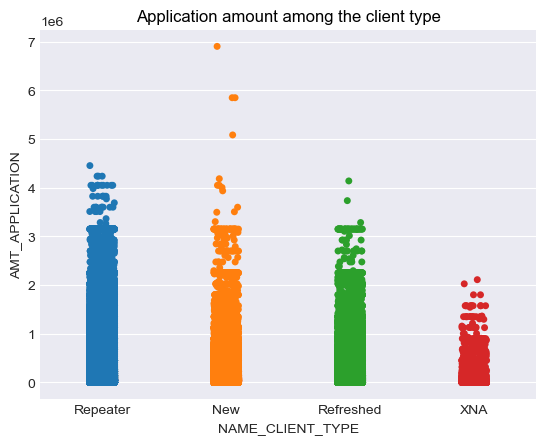

In [141]:
# Application amount among the client type:
sns.stripplot(data=prev_data,x= "NAME_CLIENT_TYPE", y="AMT_APPLICATION" )
plt.title("Application amount among the client type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})

Text(0.5, 1.0, 'Application amount among the client status')

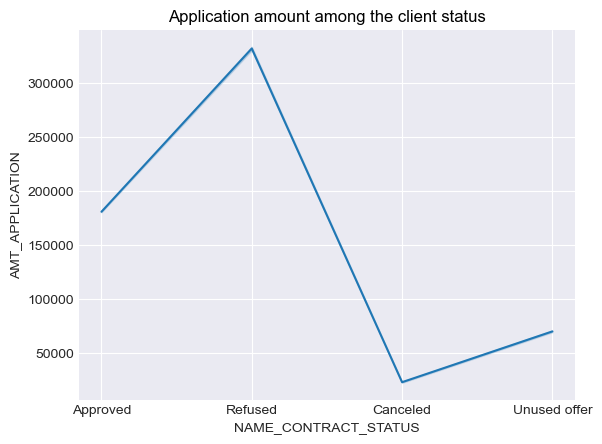

In [142]:
# Application amount among the client status:
sns.lineplot(data=prev_data,x= "NAME_CONTRACT_STATUS", y="AMT_APPLICATION" )
plt.title("Application amount among the client status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})

In [143]:
prev_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

<AxesSubplot:>

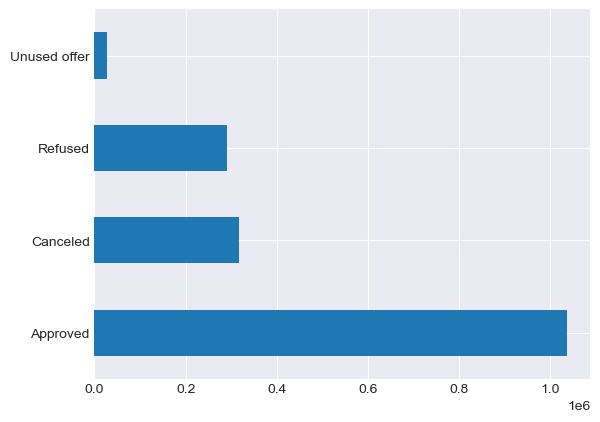

In [144]:
# Contract status of applicants:
prev_data.NAME_CONTRACT_STATUS.value_counts().plot.barh()

<AxesSubplot:>

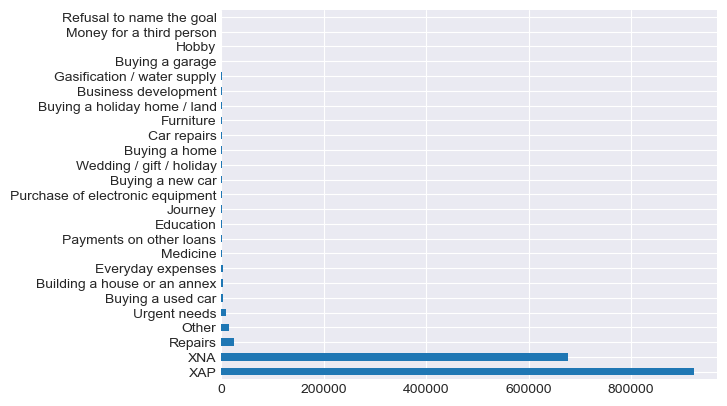

In [145]:
# Cash loan purpose distribution:
prev_data.NAME_CASH_LOAN_PURPOSE.value_counts().plot.barh()

<AxesSubplot:>

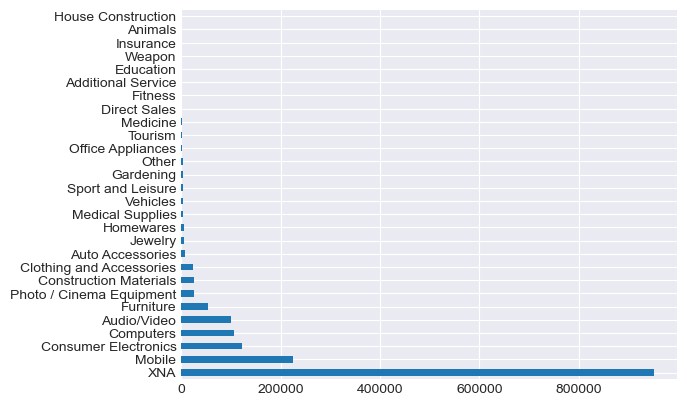

In [146]:
# Goods category values:
prev_data.NAME_GOODS_CATEGORY.value_counts().plot.barh()

## Findings:
- Previous application data contains 1670214 rows and 37 columns.
- There are very high number of missing values in the data.
- I have dropped columns which are having 40% and more missing values.
- Cash loans and consumer loans are high in number compared to revolving loans.
- Approved loans are high in number.
- clients who are applied for loan are mostly repeated clients.
- Most of the loan purpose is in XAP and XNA.
- Mobiles comes in second place for loan application.

## Merging the data

In [147]:
# Merging:
Complete_data = pd.merge(data, prev_data, how="inner", on= "SK_ID_CURR")

In [148]:
# First 5rows of data:
Complete_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age,Experience,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,26,2,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,46,3,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,46,3,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,46,3,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,52,1,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [149]:
# Shape of the data:
Complete_data.shape

(1413701, 69)

In [150]:
# Information of data:
Complete_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 69 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413701 non-null  float64
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64
 11  NAME_TYPE_SUITE               1413701 non-null  object 
 12  NAME_INCOME_TYPE            

In [151]:
# Checking null values:
Complete_data.isnull().sum().sort_values(ascending=False)

AMT_CREDIT_y                    1
SK_ID_CURR                      0
SK_ID_PREV                      0
WEEKDAY_APPR_PROCESS_START_y    0
AMT_GOODS_PRICE_y               0
AMT_APPLICATION                 0
AMT_ANNUITY_y                   0
NAME_CONTRACT_TYPE_y            0
Experience                      0
EXT_SOURCE_2                    0
Age                             0
DAYS_LAST_PHONE_CHANGE          0
DEF_60_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_30_CNT_SOCIAL_CIRCLE        0
HOUR_APPR_PROCESS_START_y       0
FLAG_LAST_APPL_PER_CONTRACT     0
NFLAG_LAST_APPL_IN_DAY          0
NAME_CASH_LOAN_PURPOSE          0
NAME_CONTRACT_STATUS            0
DAYS_DECISION                   0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON              0
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_TYPE               0
CHANNEL_TYPE                    0
SELLERPLACE_AR

In [152]:
# Distribution of contract type:
Complete_data.NAME_CONTRACT_TYPE_x.value_counts()

Cash loans         1307115
Revolving loans     106586
Name: NAME_CONTRACT_TYPE_x, dtype: int64

In [153]:
# We have data imbalance hence dividing the data for better analysis:
T0 = Complete_data[Complete_data["TARGET"]==0]
T1 = Complete_data[Complete_data["TARGET"]==1]


## Analyzing data

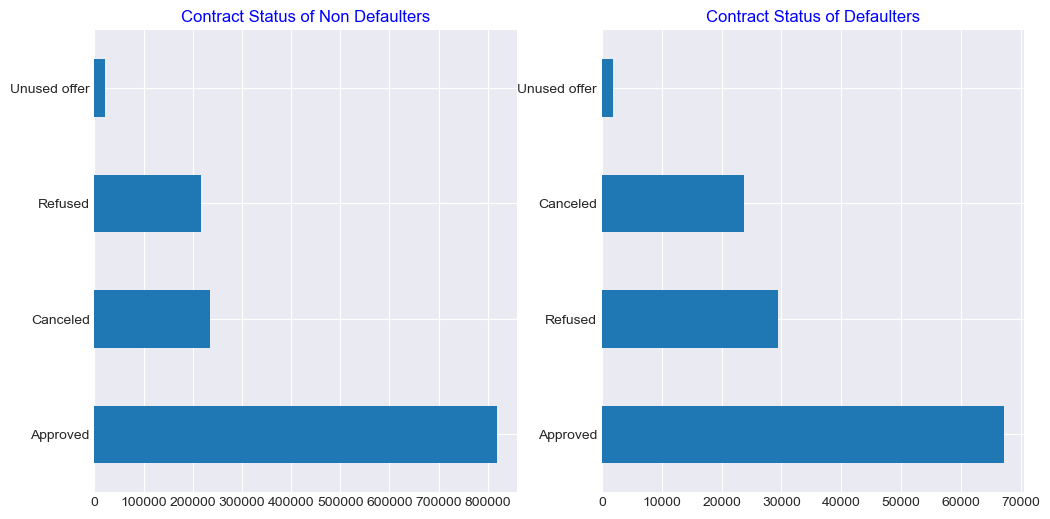

In [154]:
# Analyzing contract status:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
T0.NAME_CONTRACT_STATUS.value_counts().plot.barh()
plt.title("Contract Status of Non Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.subplot(1,2,2)
T1.NAME_CONTRACT_STATUS.value_counts().plot.barh()
plt.title("Contract Status of Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

In [155]:
print(T0.NAME_CONTRACT_STATUS.value_counts())
print(T1.NAME_CONTRACT_STATUS.value_counts())

Approved        818856
Canceled        235641
Refused         215952
Unused offer     20892
Name: NAME_CONTRACT_STATUS, dtype: int64
Approved        67243
Refused         29438
Canceled        23800
Unused offer     1879
Name: NAME_CONTRACT_STATUS, dtype: int64


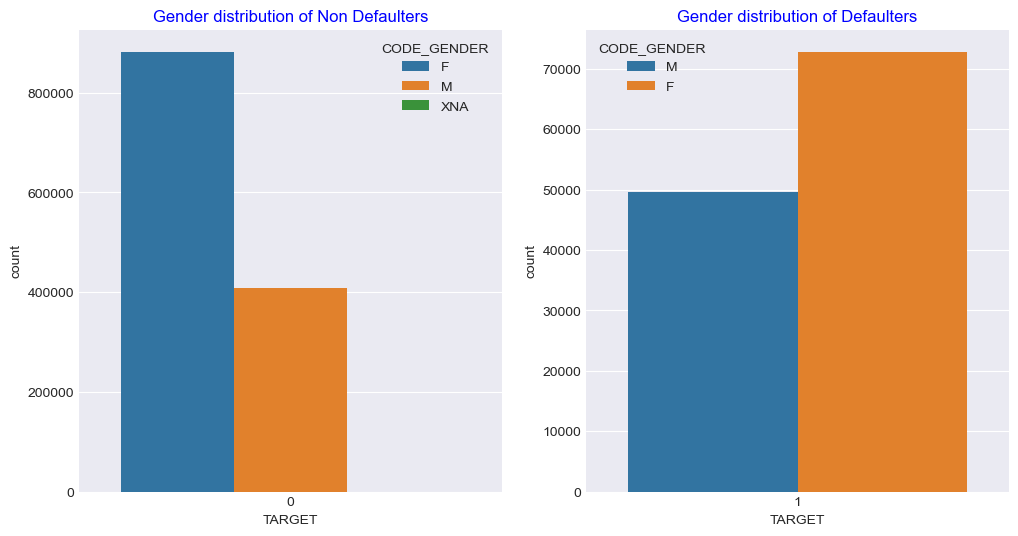

In [156]:
# Gender Distribution:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data= T0, x="TARGET", hue="CODE_GENDER")
plt.title("Gender distribution of Non Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.subplot(1,2,2)
sns.countplot(data= T1, x="TARGET", hue="CODE_GENDER")
plt.title("Gender distribution of Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()


Text(0.5, 1.0, 'Income & Family status distribution of Non Defaulters')

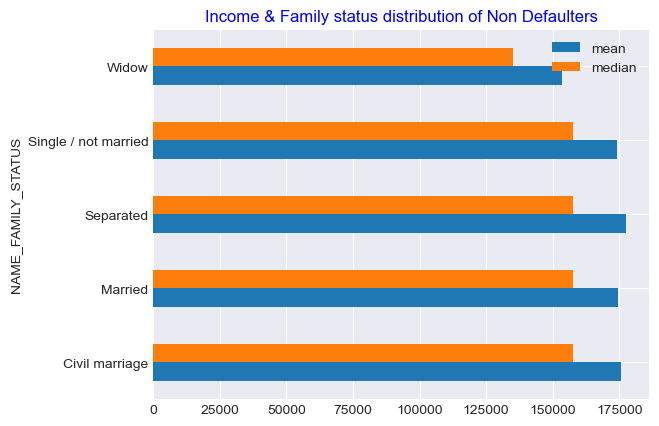

In [157]:
# Income & Family status distribution:
T0.groupby("NAME_FAMILY_STATUS")["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.barh()
plt.title("Income & Family status distribution of Non Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})

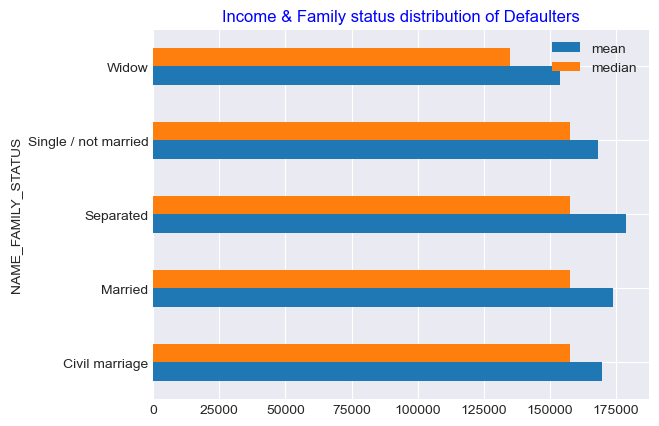

In [158]:
# Income & Family status distribution
T1.groupby("NAME_FAMILY_STATUS")["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.barh()
plt.title("Income & Family status distribution of Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

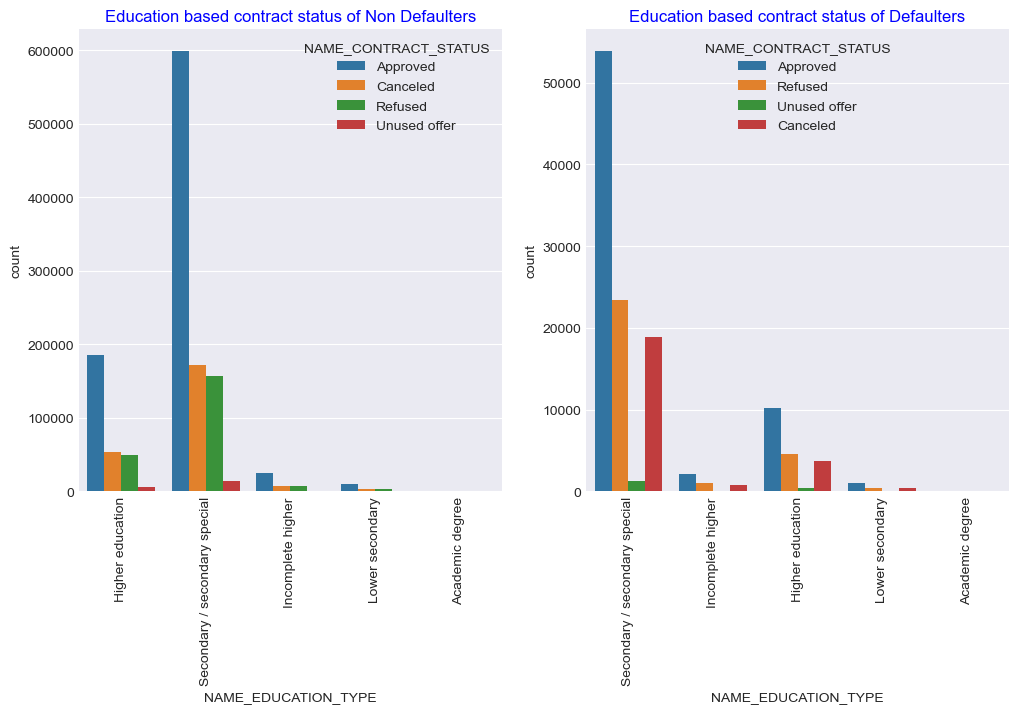

In [159]:
# Education based contract status:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data= T0, x="NAME_EDUCATION_TYPE", hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.title("Education based contract status of Non Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.subplot(1,2,2)
sns.countplot(data= T1, x="NAME_EDUCATION_TYPE", hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.title("Education based contract status of Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

### Findings:
- After merging the data, there are 1413701 rows and 69 columns available.
- There 67243 approved loans who are having payment difficulty.
- Female clients have more payment difficulties compared to males.
- Clients with secondary education is having the highest approval count.

## Conclusion:
- Clients who are applied for cash loans have more payment difficulties.
- Working professional, people with secondary education and married people are having more payment difficulties.
- Female applicants are comparatively more in number in terms for payment difficulties.
- People who are not having the own reality and car are having more payment difficulties then people who are having the same.
- Applicants whose income between 1,00,000 to 2,00,000 are highly facing payment difficulties.
- People live in Co-op apartment and civil married are having high 60 DPD (days past due) default.
- Married clients whose education is secondary and income between 1,00,000 to 2,00,000 are having more payment difficulties.